In [ ]:
import pandas as pd

# Load the merged outcome file
df = pd.read_csv("outcome_merged.csv")

# Create the column name for each run's difference
df['dif_label'] = 'dif_' + df['run_id']

# Select relevant columns
df = df[['comboID', 'dif_label', 'Difference (%)']]

# Aggregate duplicates by taking the mean Difference (%) for each comboID and run
df_agg = df.groupby(['comboID', 'dif_label'])['Difference (%)'].mean().reset_index()

# Pivot the table
pivot_df = df_agg.pivot(index='comboID', columns='dif_label', values='Difference (%)')



In [5]:
pivot_df

dif_label,dif_Felix1,dif_Felix2,dif_Felix3
comboID,,,
0,18.36,25.25,31.7
1,25.62,5.45,12.8
2,4.60,10.70,36.8
3,15.86,20.35,20.9
4,16.74,4.25,1.1
...,...,...,...
675,23.40,17.80,21.4
676,2.70,21.80,20.2
677,19.90,2.30,31.4


In [6]:


# Calculate statistics across the dif_* columns
pivot_df['mean'] = pivot_df.mean(axis=1, skipna=True)
pivot_df['median'] = pivot_df.median(axis=1, skipna=True)
pivot_df['range'] = pivot_df.max(axis=1, skipna=True) - pivot_df.min(axis=1, skipna=True)

# Reset index to make comboID a column again
pivot_df = pivot_df.reset_index()

# Save to new file
pivot_df.to_csv("comboID_summary.csv", index=False)

print("Summary saved as comboID_summary.csv")


Summary saved as comboID_summary.csv


In [8]:
pivot_df

dif_label,comboID,dif_Felix1,dif_Felix2,dif_Felix3,mean,median,range
0,0,18.36,25.25,31.7,25.103333,25.176667,13.34
1,1,25.62,5.45,12.8,14.623333,13.711667,20.17
2,2,4.60,10.70,36.8,17.366667,14.033333,32.20
3,3,15.86,20.35,20.9,19.036667,19.693333,5.04
4,4,16.74,4.25,1.1,7.363333,5.806667,15.64
...,...,...,...,...,...,...,...
675,675,23.40,17.80,21.4,20.866667,21.133333,5.60
676,676,2.70,21.80,20.2,14.900000,17.550000,19.10
677,677,19.90,2.30,31.4,17.866667,18.883333,29.10
678,678,30.20,26.10,31.9,29.400000,29.800000,5.80


In [7]:
# Load the summary file
summary_df = pd.read_csv("comboID_summary.csv")

# Describe the 'range' column
range_description = summary_df['range'].describe()

# Print summary statistics
print("Range Column Summary Statistics:")
print(range_description)

Range Column Summary Statistics:
count    680.000000
mean      10.171912
std        6.419868
min        0.200000
25%        5.175000
50%        8.750000
75%       14.200000
max       33.600000
Name: range, dtype: float64


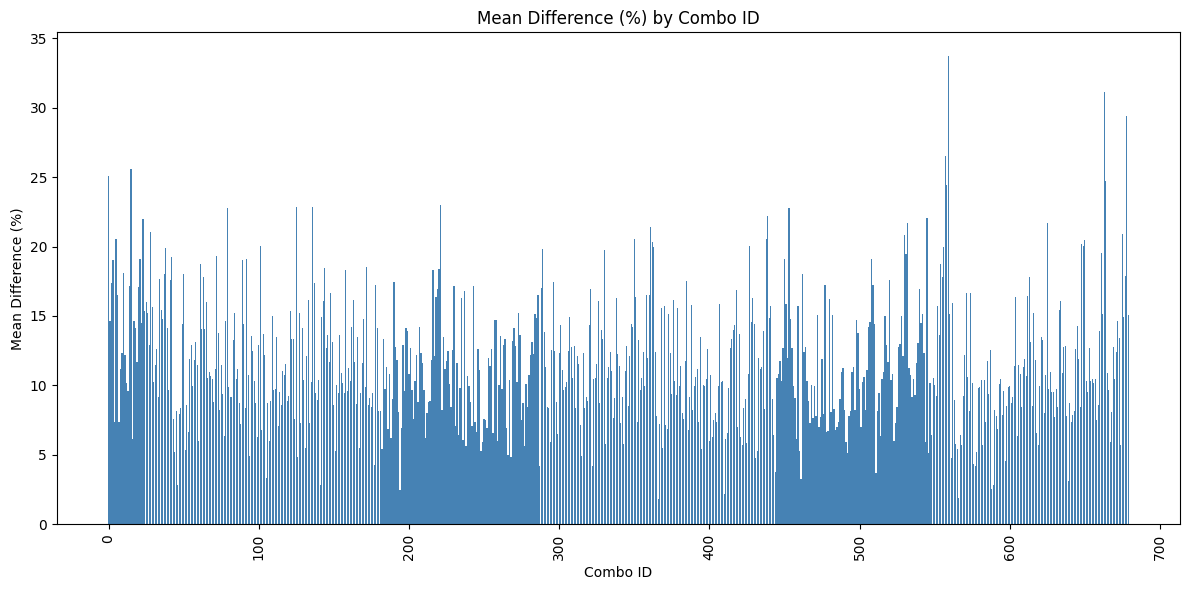

In [10]:
import matplotlib.pyplot as plt


plt.figure(figsize=(12, 6))
plt.bar(summary_df['comboID'], summary_df['mean'], color='steelblue')
plt.xlabel('Combo ID')
plt.ylabel('Mean Difference (%)')
plt.title('Mean Difference (%) by Combo ID')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()